# 06. Rearch (LG 계열사 투자 리서치 시스템)

## 🎯 **프로젝트 개요**

**목표**: LG 그룹 계열사 전문 멀티 에이전트 투자 분석 시스템 구축

**대상 고객**: LG CNS 임직원 및 파트너사 투자자

### 🏢 **분석 대상 기업**:
- **LG전자**: 생활가전, 차량부품솔루션 글로벌 기업
- **LG CNS**: 디지털 트랜스포메이션 및 IT 서비스  
- **LG화학**: 배터리, 석유화학, 첨단소재
- **LG에너지솔루션**: 전기차 배터리 전문 기업

### 🤖 **AI 에이전트 팀 구성**:
- **정보 수집**: 웹 검색을 통한 기업 정보 수집
- **데이터 분석**: 실시간 주가 데이터 및 기술적 분석
- **보고서 작성**: 종합적인 투자 분석 리포트 생성

### 🚀 **시스템 특징**:
- 한국 주식 시장 특화 (자동 티커 변환)
- LG 그룹 계열사 전문 데이터베이스
- 실시간 주가 분석 및 차트 생성
- 한국어 기반 투자 보고서

## 🔧 1. 라이브러리 및 환경 설정

**목적**: AutoGen 에이전트 시스템과 Azure OpenAI 연동을 위한 기본 설정

**포함 요소**:
- AutoGen 라이브러리: 에이전트, 팀, UI 컴포넌트
- Azure OpenAI 클라이언트: GPT 모델 연동
- 환경 변수: API 키 및 엔드포인트 설정

**실행 결과**: Azure OpenAI 채팅 완성 클라이언트가 생성됩니다.

In [2]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.conditions import TextMentionTermination
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_core.tools import FunctionTool

from autogen_ext.models.openai import AzureOpenAIChatCompletionClient
from dotenv import load_dotenv
import os

load_dotenv()

api_version = os.getenv("AZURE_OPENAI_API_VERSION")
api_key = os.getenv("AZURE_OPENAI_KEY")
azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
deployment_name = os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME")
azure_openai_chat_completion_client = AzureOpenAIChatCompletionClient(
            model=deployment_name,
            azure_endpoint=azure_endpoint,
            api_version=api_version,
            api_key=api_key,
        )



## 🔍 2. 웹 검색 함수 정의

**목적**: LG 계열사 정보 수집을 위한 인텔리전트 검색 시스템

**주요 기능**:
- **SerpAPI 연동**: 실제 웹 검색 (API 키 있을 때)
- **모의 검색 결과**: LG 계열사 중심 데이터베이스 (API 키 없을 때)
- **콘텐츠 스크래핑**: 검색 결과 페이지의 실제 내용 추출

**LG 기업 데이터베이스**:
- LG전자: 생활가전, 차량부품솔루션
- LG CNS: IT서비스, 디지털 트랜스포메이션  
- LG화학: 배터리, 석유화학, 첨단소재
- LG에너지솔루션: 전기차 배터리 전문

**실행 결과**: `google_search()` 함수가 정의되어 에이전트가 사용할 수 있습니다.

## 📈 3. 한국 주식 분석 함수 정의  

**목적**: LG 계열사 주식의 전문적인 기술적 분석 시스템

**핵심 기능**:
- **자동 티커 변환**: 한국어 → Yahoo Finance 형식 (예: LG전자 → 066570.KS)
- **기술적 분석**: 50일/200일 이동평균, 추세 판단, 변동성 계산
- **성과 지표**: 연초 대비 수익률, 52주 고저점 분석
- **데이터 시각화**: 주가 차트 및 거래량 차트 생성

**지원 종목**: LG전자, LG CNS, LG화학, LG에너지솔루션, LG디스플레이 등

**분석 결과**:
- 현재가, 52주 고저점
- 이동평균선 (50일/200일) 
- 연초 대비 수익률
- 추세 분석 (상승/하락/중립)
- 연환산 변동성

**실행 결과**: `analyze_stock()` 함수가 정의되어 실시간 주식 분석이 가능합니다.

In [3]:
def google_search(query: str, num_results: int = 2, max_chars: int = 500) -> list:  # type: ignore[type-arg]
    import os
    import time

    import requests
    from bs4 import BeautifulSoup
    from dotenv import load_dotenv

    load_dotenv()

    serp_api_key = os.getenv("SERPAPI_KEY")

    if not serp_api_key:
        # Fallback: Return mock results when API key is not available
        print("⚠️ SERPAPI_KEY not found. Using mock search results for demonstration.")
        
        # LG 계열사 중심 모의 검색 결과
        mock_results = {
            "LG전자": [
                {
                    "title": "LG전자 공식 홈페이지 - LG Electronics",
                    "link": "https://www.lge.co.kr",
                    "snippet": "LG전자는 혁신적인 기술로 더 나은 삶을 만드는 글로벌 생활가전 및 모바일 기업입니다.",
                    "body": "LG전자는 1958년 설립된 대한민국의 대표적인 전자기업으로, 생활가전, 차량부품솔루션(VS), 비즈니스솔루션(BS) 등 다양한 사업 영역에서 활동하고 있습니다. 주요 사업부문은 H&A(가전), VS(차량부품), BS(비즈니스솔루션), HE(홈엔터테인먼트) 등으로 구성되어 있습니다. 특히 프리미엄 가전제품 분야에서 글로벌 리더십을 발휘하고 있으며, 전기차 부품 사업에서 급성장하고 있습니다. LG전자는 지속가능한 미래를 위한 친환경 기술 개발에 집중하고 있습니다."
                },
                {
                    "title": "LG전자 투자정보 - IR 센터", 
                    "link": "https://www.lge.co.kr/ir",
                    "snippet": "LG전자의 분기별 실적발표, 연간 보고서, 투자자 정보를 제공합니다.",
                    "body": "LG전자는 안정적인 성장세를 보여주고 있는 글로벌 가전 기업입니다. 주요 사업 부문별 매출은 H&A(생활가전)가 핵심 사업이며, VS(차량부품솔루션) 사업이 빠르게 성장하고 있습니다. 특히 전기차 배터리, 인포테인먼트 시스템, ADAS 등 미래차 부품 분야에서 강력한 경쟁력을 보유하고 있습니다. 프리미엄 가전과 B2B 솔루션에서의 안정적인 수익성이 회사의 주요 성장 동력입니다."
                }
            ],
            "LG CNS": [
                {
                    "title": "LG CNS 공식 홈페이지 - Digital Innovation Partner",
                    "link": "https://www.lgcns.com",
                    "snippet": "LG CNS는 디지털 혁신을 선도하는 대한민국 대표 IT 서비스 기업입니다.",
                    "body": "LG CNS는 1987년 설립된 LG그룹의 IT 서비스 전문 기업으로, 디지털 트랜스포메이션, 클라우드, AI/빅데이터, 사이버보안 등 첨단 IT 솔루션을 제공합니다. 주요 사업영역은 DX컨설팅, 시스템 통합(SI), 스마트팩토리, 클라우드 서비스, AI/데이터 분석 등입니다. 국내외 다양한 산업 분야에서 디지털 혁신을 지원하며, 특히 제조업의 스마트 팩토리 구축과 금융/공공 분야의 디지털 전환에서 강점을 보이고 있습니다. LG CNS는 지속적인 기술 혁신을 통해 고객의 비즈니스 성공을 지원하고 있습니다."
                },
                {
                    "title": "LG CNS 투자정보 - IR 정보", 
                    "link": "https://www.lgcns.com/ir",
                    "snippet": "LG CNS의 사업실적, 재무정보, 투자자 관계 정보를 제공합니다.",
                    "body": "LG CNS는 안정적인 성장을 지속하고 있는 국내 대표 IT 서비스 기업입니다. 주요 매출원은 DX(디지털 트랜스포메이션) 컨설팅, 클라우드 서비스, AI/빅데이터 솔루션, 스마트팩토리 구축 등입니다. 특히 공공부문과 대기업 대상 대형 프로젝트에서 강점을 보이며, 최근 클라우드 네이티브와 AI 기반 솔루션으로 사업영역을 확장하고 있습니다. 디지털 전환 가속화와 함께 지속적인 성장이 기대되는 사업구조를 갖추고 있습니다."
                }
            ],
            "LG화학": [
                {
                    "title": "LG화학 공식 홈페이지",
                    "link": "https://www.lgchem.com",
                    "snippet": "LG화학은 배터리, 석유화학, 첨단소재 분야의 글로벌 리더입니다.",
                    "body": "LG화학은 1947년 설립된 종합화학기업으로 배터리, 석유화학, 첨단소재 사업을 영위하고 있습니다. 특히 전기차용 배터리 분야에서 세계 2위의 시장점유율을 보유하고 있으며, GM, 테슬라, 현대차 등 글로벌 완성차 업체들과 파트너십을 구축하고 있습니다."
                }
            ],
            "LG에너지솔루션": [
                {
                    "title": "LG에너지솔루션 공식 홈페이지",
                    "link": "https://www.lgensol.com",
                    "snippet": "LG에너지솔루션은 전기차 배터리 분야의 글로벌 리더입니다.",
                    "body": "LG에너지솔루션은 2020년 LG화학에서 분할된 배터리 전문기업으로, 전기차용 배터리, ESS, 소형 배터리 등을 생산합니다. 전 세계 주요 자동차 제조사와 장기 공급계약을 체결하고 있으며, 차세대 배터리 기술 개발에 적극 투자하고 있습니다."
                }
            ]
        }
        
        # LG 계열사 키워드 확인
        if any(keyword in query.lower() for keyword in ["lg전자", "lge", "066570"]):
            return mock_results["LG전자"][:num_results]
        elif any(keyword in query.lower() for keyword in ["lg cns", "lgcns", "엘지씨엔에스", "049070"]):
            return mock_results["LG CNS"][:num_results]
        elif any(keyword in query.lower() for keyword in ["lg화학", "lgchem", "051910"]):
            return mock_results["LG화학"][:num_results]
        elif any(keyword in query.lower() for keyword in ["lg에너지솔루션", "에너지솔루션", "373220"]):
            return mock_results["LG에너지솔루션"][:num_results]
        else:
            # Generic fallback for other queries
            return [
                {
                    "title": f"Search Results for: {query}",
                    "link": "https://example.com",
                    "snippet": f"Mock search results for '{query}'. This is a demonstration result when SerpAPI key is not available.",
                    "body": f"This is mock content for the search query '{query}'. In a real implementation, this would contain actual search results from the web. The query was processed but no real API call was made due to missing SerpAPI credentials. To get real results, please add your SerpAPI key to the environment variables."
                }
            ][:num_results]

    url = "https://serpapi.com/search"
    params = {
        "engine": "google",
        "q": query,
        "num": num_results,
        "api_key": serp_api_key,
    }

    response = requests.get(url, params=params)

    if response.status_code != 200:
        print(response.json())
        raise Exception(f"Error in API request: {response.status_code}")

    results = response.json().get("organic_results", [])

    def get_page_content(url: str) -> str:
        try:
            response = requests.get(url, timeout=10)
            soup = BeautifulSoup(response.content, "html.parser")
            text = soup.get_text(separator=" ", strip=True)
            words = text.split()
            content = ""
            for word in words:
                if len(content) + len(word) + 1 > max_chars:
                    break
                content += " " + word
            return content.strip()
        except Exception as e:
            print(f"Error fetching {url}: {str(e)}")
            return ""

    enriched_results = []
    for item in results:
        body = get_page_content(item["link"])
        enriched_results.append(
            {"title": item["title"], "link": item["link"], "snippet": item.get("snippet", ""), "body": body}
        )
        time.sleep(1)  # Be respectful to the servers

    return enriched_results


In [4]:
def analyze_stock(ticker: str) -> dict:  # type: ignore[type-arg]
    import os
    from datetime import datetime, timedelta

    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import yfinance as yf
    from pytz import timezone  # type: ignore

    # 한국 주식 코드 처리
    korean_stocks = {
        "LG전자": "066570.KS",
        "LG CNS": "049070.KS", 
        "LG화학": "051910.KS",
        "LG에너지솔루션": "373220.KS",
        "LG디스플레이": "034220.KS",
        "LG이노텍": "011070.KS",
        "LG유플러스": "032640.KS",
        "LG생활건강": "051900.KS",
        "LG하우시스": "108670.KS",
        "066570": "066570.KS",
        "049070": "049070.KS",
        "051910": "051910.KS", 
        "373220": "373220.KS",
        "034220": "034220.KS",
        "011070": "011070.KS",
        "032640": "032640.KS",
        "051900": "051900.KS",
        "108670": "108670.KS"
    }
    
    # 티커 심볼 변환
    original_ticker = ticker
    if ticker in korean_stocks:
        ticker = korean_stocks[ticker]
        print(f"📈 한국 주식 '{original_ticker}' -> '{ticker}' 로 변환")
    
    stock = yf.Ticker(ticker)

    # Get historical data (1 year of data to ensure we have enough for 200-day MA)
    end_date = datetime.now(timezone("UTC"))
    start_date = end_date - timedelta(days=365)
    hist = stock.history(start=start_date, end=end_date)

    # Ensure we have data
    if hist.empty:
        return {"error": "No historical data available for the specified ticker."}

    # Compute basic statistics and additional metrics
    current_price = stock.info.get("currentPrice", hist["Close"].iloc[-1])
    year_high = stock.info.get("fiftyTwoWeekHigh", hist["High"].max())
    year_low = stock.info.get("fiftyTwoWeekLow", hist["Low"].min())

    # Calculate 50-day and 200-day moving averages
    ma_50 = hist["Close"].rolling(window=50).mean().iloc[-1]
    ma_200 = hist["Close"].rolling(window=200).mean().iloc[-1]

    # Calculate YTD price change and percent change
    ytd_start = datetime(end_date.year, 1, 1, tzinfo=timezone("UTC"))
    ytd_data = hist.loc[ytd_start:]  # type: ignore[misc]
    if not ytd_data.empty:
        price_change = ytd_data["Close"].iloc[-1] - ytd_data["Close"].iloc[0]
        percent_change = (price_change / ytd_data["Close"].iloc[0]) * 100
    else:
        price_change = percent_change = np.nan

    # Determine trend
    if pd.notna(ma_50) and pd.notna(ma_200):
        if ma_50 > ma_200:
            trend = "Upward"
        elif ma_50 < ma_200:
            trend = "Downward"
        else:
            trend = "Neutral"
    else:
        trend = "Insufficient data for trend analysis"

    # Calculate volatility (standard deviation of daily returns)
    daily_returns = hist["Close"].pct_change().dropna()
    volatility = daily_returns.std() * np.sqrt(252)  # Annualized volatility

    # Create result dictionary
    result = {
        "ticker": original_ticker,
        "yfinance_symbol": ticker,
        "current_price": current_price,
        "52_week_high": year_high,
        "52_week_low": year_low,
        "50_day_ma": ma_50,
        "200_day_ma": ma_200,
        "ytd_price_change": price_change,
        "ytd_percent_change": percent_change,
        "trend": trend,
        "volatility": volatility,
    }

    # Convert numpy types to Python native types for better JSON serialization
    for key, value in result.items():
        if isinstance(value, np.generic):
            result[key] = value.item()

    # Generate plot
    plt.figure(figsize=(12, 6))
    plt.plot(hist.index, hist["Close"], label="Close Price")
    plt.plot(hist.index, hist["Close"].rolling(window=50).mean(), label="50-day MA")
    plt.plot(hist.index, hist["Close"].rolling(window=200).mean(), label="200-day MA")
    plt.title(f"{original_ticker} ({ticker}) Stock Price (Past Year)")
    plt.xlabel("Date")
    plt.ylabel("Price (KRW)" if ticker.endswith('.KS') else "Price ($)")
    plt.legend()
    plt.grid(True)

    # Save plot to file
    os.makedirs("coding", exist_ok=True)
    plot_file_path = f"coding/{original_ticker.replace(' ', '_')}_stockprice.png"
    plt.savefig(plot_file_path)
    print(f"Plot saved as {plot_file_path}")
    result["plot_file_path"] = plot_file_path

    return result

## 🇰🇷 한국 주식 데이터 처리

1. **자동 티커 변환**: 한국 회사명 → yfinance 심볼
   - `"LG CNS"` → `"049070.KS"`
   - `"LG전자"` → `"066570.KS"`
   
2. **지원되는 입력 형식**:
   - 한국 회사명: `LG전자`, `LG CNS`, `LG화학` 등
   - 주식 코드: `066570`, `049070`, `051910` 등
   - 자동으로 `.KS` 접미사 추가

3. **차트**:
   - 한국 주식은 KRW 단위 표시
   - 원래 회사명과 심볼 모두 표시

### 📊 **사용 예시**:
```python
# 모두 정상 작동합니다
analyze_stock("LG CNS")      # → 049070.KS
analyze_stock("049070")      # → 049070.KS  
analyze_stock("LG전자")      # → 066570.KS
```

## 🤖 4. 전문 AI 에이전트 생성

**목적**: LG 계열사 투자 분석을 위한 전문화된 AI 에이전트 팀 구성

### 👥 **에이전트 구성**:

#### 🔍 **LG 정보 검색 에이전트**
- **역할**: LG 그룹 및 계열사 전문 정보 수집
- **도구**: 웹 검색 도구 (`google_search`)
- **전문 분야**: LG전자, LG CNS, LG화학, LG에너지솔루션 기업 정보
- **언어**: 한국어 응답

#### 📈 **LG 주식 분석 에이전트** 
- **역할**: LG 계열사 주식 데이터 분석 및 차트 생성
- **도구**: 주식 분석 도구 (`analyze_stock`)
- **기능**: 자동 티커 변환, 기술적 분석, 투자 인사이트 제공
- **언어**: 한국어 응답

#### 📊 **투자 보고서 에이전트**
- **역할**: 종합적인 투자 분석 보고서 작성
- **기능**: 검색 결과와 주식 분석을 바탕으로 최종 리포트 생성
- **언어**: 한국어 응답

**실행 결과**: 3개의 전문화된 에이전트가 생성되어 협업 준비 완료

In [5]:
google_search_tool = FunctionTool(
    google_search, description="Search Google for information, returns results with a snippet and body content"
)
stock_analysis_tool = FunctionTool(analyze_stock, description="Analyze stock data and generate a plot")

search_agent = AssistantAgent(
    name="LG_Info_Search_Agent",
    model_client=azure_openai_chat_completion_client,
    tools=[google_search_tool],
    description="LG 계열사 및 관련 기업 정보를 검색하여 상위 2개 결과를 스니펫과 본문 내용과 함께 제공합니다",
    system_message="당신은 LG 그룹 및 계열사 전문 정보 검색 에이전트입니다. LG전자, LG CNS, LG화학, LG에너지솔루션 등 LG 계열사들의 정보를 정확하고 상세하게 검색해주세요. 한국어로 응답해주세요.",
)

stock_analysis_agent = AssistantAgent(
    name="LG_Stock_Analysis_Agent",
    model_client=azure_openai_chat_completion_client,
    tools=[stock_analysis_tool],
    description="LG 계열사 주식 데이터를 분석하고 차트를 생성합니다",
    system_message="당신은 LG 그룹 계열사 주식 분석 전문가입니다. 한국 주식 분석 시 다음 중 하나를 사용하세요: 'LG전자', 'LG CNS', 'LG화학', 'LG에너지솔루션' 등의 회사명 또는 '066570', '049070' 등의 주식 코드. 시스템이 자동으로 올바른 yfinance 심볼로 변환합니다. LG 그룹의 사업 특성을 고려한 투자 인사이트를 제공해주세요. 한국어로 응답해주세요.",
)

report_agent = AssistantAgent(
    name="LG_Investment_Report_Agent",
    model_client=azure_openai_chat_completion_client,
    description="LG 계열사 검색 결과와 주식 분석을 바탕으로 LG CNS 고객을 위한 전문 투자보고서를 작성합니다",
    system_message="당신은 LG 그룹 전문 애널리스트입니다. LG 계열사들의 정보와 주식 분석 결과를 종합하여 LG CNS 고객들을 위한 포괄적이고 실용적인 투자 보고서를 작성해주세요. LG 그룹의 시너지 효과와 계열사 간 연관성도 고려해서 분석해주세요. 보고서 작성이 완료되면 'TERMINATE'로 응답하세요. 모든 내용을 한국어로 작성해주세요.",
)

## 📋 실행 가이드

**셀 순서대로 실행**: 라이브러리 → 함수 정의 → 에이전트 생성 → 팀 구성 → 실습

## 🎯 5. 멀티 에이전트 팀 구성 및 실행

**목적**: 3개 에이전트의 협업을 통한 LG전자 투자 보고서 생성

### 🔄 **작업 순환 방식 (Round Robin)**:
1. **검색 에이전트**: LG전자 기업 정보 수집
2. **주식 분석 에이전트**: LG전자 주가 데이터 분석  
3. **보고서 에이전트**: 종합 투자 보고서 작성 → `TERMINATE`

### ⚙️ **팀 설정**:
- **최대 턴수**: 3회 (각 에이전트 1회씩)
- **종료 조건**: "TERMINATE" 메시지 감지
- **실행 방식**: 순환형 그룹 채팅

**실행 결과**: LG전자에 대한 완전한 투자 분석 보고서가 생성됩니다.

✅ LG 투자분석팀 구성 완료

🚀 LG전자 종합 투자보고서 작성 시작...
---------- TextMessage (user) ----------
LG전자 종합 투자보고서를 작성해주세요
---------- ToolCallRequestEvent (LG_Stock_Analysis_Agent) ----------
[FunctionCall(id='call_lg4W58vk3NndUpX82fKNVGIG', arguments='{"ticker":"066570"}', name='analyze_stock')]
📈 한국 주식 '066570' -> '066570.KS' 로 변환
Plot saved as coding/066570_stockprice.png
---------- ToolCallExecutionEvent (LG_Stock_Analysis_Agent) ----------
[FunctionExecutionResult(content="{'ticker': '066570', 'yfinance_symbol': '066570.KS', 'current_price': 87600.0, '52_week_high': 96400.0, '52_week_low': 64100.0, '50_day_ma': 79558.0, '200_day_ma': 76918.37255859375, 'ytd_price_change': 4652.5546875, 'ytd_percent_change': 5.609039157229921, 'trend': 'Upward', 'volatility': 0.2933640616001876, 'plot_file_path': 'coding/066570_stockprice.png'}", name='analyze_stock', call_id='call_lg4W58vk3NndUpX82fKNVGIG', is_error=False)]
---------- ToolCallSummaryMessage (LG_Stock_Analysis_Agent) ----------
{'ticker': '066570',

TaskResult(messages=[TextMessage(id='a0489958-dd84-434a-a85a-46cae5fc7ceb', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 11, 1, 11, 36, 44, 342745, tzinfo=datetime.timezone.utc), content='LG전자 종합 투자보고서를 작성해주세요', type='TextMessage'), ToolCallRequestEvent(id='b150ae2d-f020-48e8-a28f-84174be9c3a3', source='LG_Stock_Analysis_Agent', models_usage=RequestUsage(prompt_tokens=164, completion_tokens=17), metadata={}, created_at=datetime.datetime(2025, 11, 1, 11, 36, 45, 172088, tzinfo=datetime.timezone.utc), content=[FunctionCall(id='call_lg4W58vk3NndUpX82fKNVGIG', arguments='{"ticker":"066570"}', name='analyze_stock')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(id='442438a4-346b-4e8c-81a0-0e4337c40a33', source='LG_Stock_Analysis_Agent', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 11, 1, 11, 36, 47, 642113, tzinfo=datetime.timezone.utc), content=[FunctionExecutionResult(content="{'ticker': '066570', 'yfinance_symbol': '06657

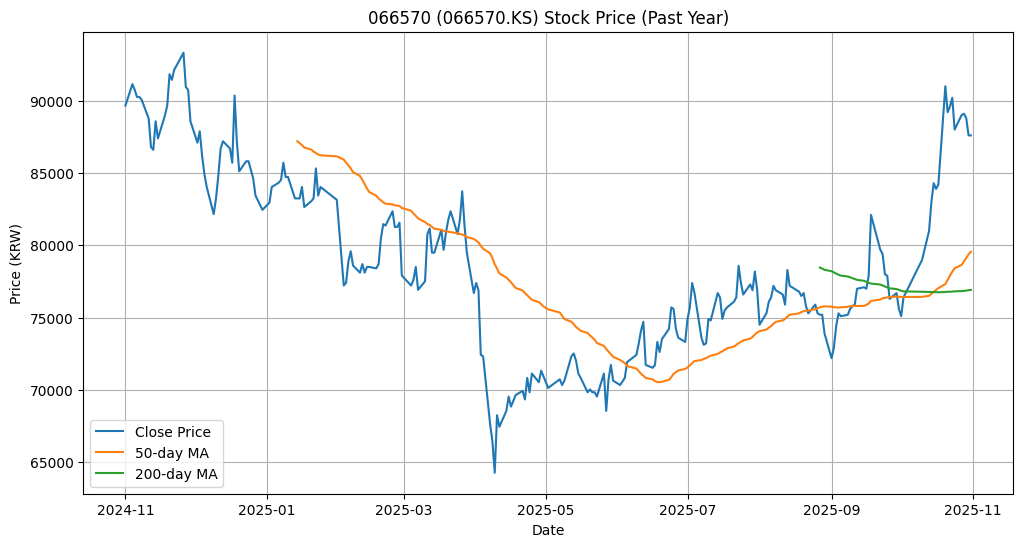

📈 한국 주식 '049070' -> '049070.KS' 로 변환
Plot saved as coding/049070_stockprice.png
⚠️ SERPAPI_KEY not found. Using mock search results for demonstration.


In [6]:
# 수정된 에이전트들로 팀 구성 (에이전트 이름 영문 변경으로 오류 해결)
print("✅ LG 투자분석팀 구성 완료")
team_fixed = RoundRobinGroupChat([stock_analysis_agent, search_agent, report_agent], max_turns=3)

# 이제 LG전자 투자보고서를 작성해보겠습니다
print("\n🚀 LG전자 종합 투자보고서 작성 시작...")
stream = team_fixed.run_stream(task="LG전자 종합 투자보고서를 작성해주세요")
await Console(stream)

## 🎓 6. 추가 실습: 다른 LG 계열사 분석

**목적**: 다양한 LG 계열사의 투자 매력도 비교 분석

### 💡 **실습 가능한 기업들**:
- **LG CNS** (049070.KS): IT서비스, 디지털 트랜스포메이션  
- **LG화학** (051910.KS): 배터리, 석유화학, 첨단소재
- **LG에너지솔루션** (373220.KS): 전기차 배터리 전문
- **LG생활건강** (051900.KS): 생활용품, 화장품

### 📋 **분석 방법**:
아래 코드 템플릿을 사용하여 원하는 기업을 분석하세요.

## 🏢 LG 계열사 투자보고서 작성 실습

LG CNS 고객을 위한 LG 그룹 계열사 투자보고서 작성 실습입니다.
다음 LG 계열사들 중 하나를 선택하여 심층 분석해보세요:

- **LG전자 (066570)**: 생활가전, 차량부품솔루션 글로벌 기업
- **LG CNS (049070)**: 디지털 혁신 및 IT 서비스 전문기업  
- **LG화학 (051910)**: 배터리, 석유화학, 첨단소재 분야
- **LG에너지솔루션 (373220)**: 전기차 배터리 글로벌 리더

**참고**: 해외 상장 주식의 경우 티커 심볼을 사용하세요 (예: AAPL, GOOGL, MSFT)

### 💻 **실습 1: LG CNS 투자 보고서**

**분석 목표**: LG CNS의 IT서비스 및 디지털 트랜스포메이션 사업 경쟁력 분석

**주요 분석 포인트**:
- 디지털 혁신 시장에서의 포지션
- 클라우드, AI/빅데이터 솔루션 경쟁력  
- 스마트 팩토리 사업 성장성
- 주가 기술적 분석 및 투자 전망

=== 💻 LG CNS 투자보고서 작성 ===
---------- TextMessage (user) ----------
LG CNS에 대한 종합적인 투자 분석 보고서를 작성해주세요. 디지털 트랜스포메이션 시장에서의 경쟁력, 주가 분석, 성장 전망을 포함해서 작성해주세요.
---------- ToolCallRequestEvent (LG_Stock_Analysis_Agent) ----------
[FunctionCall(id='call_TXcr4Sm38uPKA62xGQ0LHXIV', arguments='{"ticker":"049070"}', name='analyze_stock')]
---------- ToolCallExecutionEvent (LG_Stock_Analysis_Agent) ----------
[FunctionExecutionResult(content="{'ticker': '049070', 'yfinance_symbol': '049070.KS', 'current_price': 16180.0, '52_week_high': 22700.0, '52_week_low': 13960.0, '50_day_ma': 15695.8, '200_day_ma': 16847.34333984375, 'ytd_price_change': -3042.857421875, 'ytd_percent_change': -15.829371019587986, 'trend': 'Downward', 'volatility': 0.4072560979940693, 'plot_file_path': 'coding/049070_stockprice.png'}", name='analyze_stock', call_id='call_TXcr4Sm38uPKA62xGQ0LHXIV', is_error=False)]
---------- ToolCallSummaryMessage (LG_Stock_Analysis_Agent) ----------
{'ticker': '049070', 'yfinance_symbol': '049070

TaskResult(messages=[TextMessage(id='a1dfe40b-1367-4ce4-be8d-8d014b80b07b', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 11, 1, 11, 37, 7, 39911, tzinfo=datetime.timezone.utc), content='LG CNS에 대한 종합적인 투자 분석 보고서를 작성해주세요. 디지털 트랜스포메이션 시장에서의 경쟁력, 주가 분석, 성장 전망을 포함해서 작성해주세요.', type='TextMessage'), ToolCallRequestEvent(id='d500b4b2-fee8-425c-9687-4192b5fc8fb9', source='LG_Stock_Analysis_Agent', models_usage=RequestUsage(prompt_tokens=1645, completion_tokens=17), metadata={}, created_at=datetime.datetime(2025, 11, 1, 11, 37, 7, 714067, tzinfo=datetime.timezone.utc), content=[FunctionCall(id='call_TXcr4Sm38uPKA62xGQ0LHXIV', arguments='{"ticker":"049070"}', name='analyze_stock')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(id='7c110be9-f205-4336-bf86-249f03c1463d', source='LG_Stock_Analysis_Agent', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 11, 1, 11, 37, 8, 891509, tzinfo=datetime.timezone.utc), content=[FunctionExecutionRe

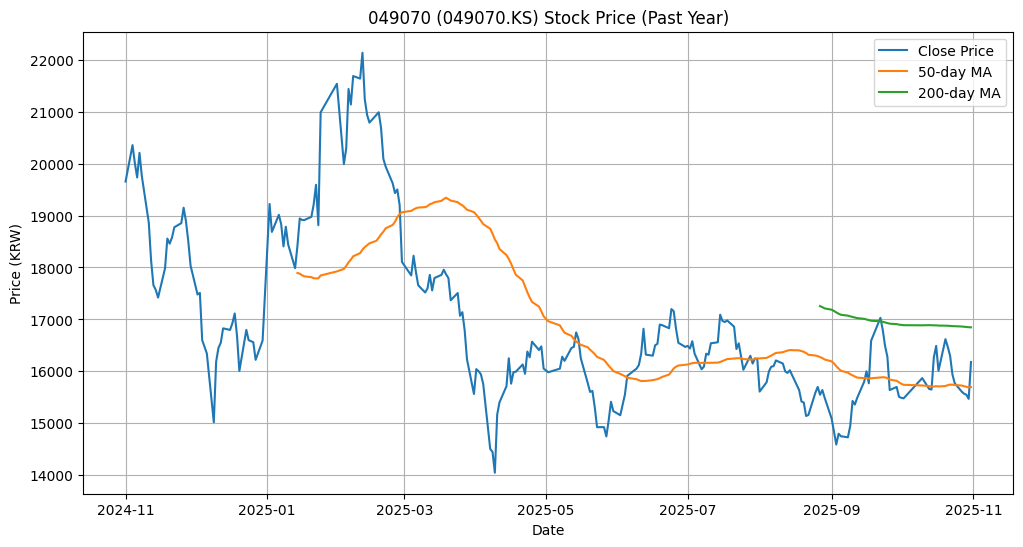

In [7]:
# LG CNS 투자보고서 작성 (한국 주식코드: 049070)
print("=== 💻 LG CNS 투자보고서 작성 ===")
lgcns_task = "LG CNS에 대한 종합적인 투자 분석 보고서를 작성해주세요. 디지털 트랜스포메이션 시장에서의 경쟁력, 주가 분석, 성장 전망을 포함해서 작성해주세요."

lgcns_stream = team_fixed.run_stream(task=lgcns_task)
await Console(lgcns_stream)

### 🔋 **실습 2: LG에너지솔루션 투자 보고서**

**분석 목표**: 전기차 배터리 시장에서 LG에너지솔루션의 글로벌 경쟁력 평가

**주요 분석 포인트**:
- 전기차 배터리 시장 점유율 및 트렌드
- 주요 고객사와의 장기 공급계약
- 배터리 기술 혁신 및 차세대 기술 경쟁력
- 글로벌 생산 확장 전략 및 투자 계획

**팀 리셋**: 이전 분석과 독립적인 새로운 보고서 생성

In [8]:
# LG에너지솔루션 투자보고서 작성 예시
print("\n=== 🔋 LG에너지솔루션 투자보고서 작성 ===")
lges_task = "LG에너지솔루션의 사업현황과 투자전망을 분석한 투자보고서를 작성해주세요. 특히 전기차 배터리 시장에서의 경쟁력과 글로벌 확장 전략을 중심으로 분석해주세요."

# 팀 리셋 후 새로운 분석 시작
await team_fixed.reset()
lges_stream = team_fixed.run_stream(task=lges_task)
await Console(lges_stream)


=== 🔋 LG에너지솔루션 투자보고서 작성 ===
---------- TextMessage (user) ----------
LG에너지솔루션의 사업현황과 투자전망을 분석한 투자보고서를 작성해주세요. 특히 전기차 배터리 시장에서의 경쟁력과 글로벌 확장 전략을 중심으로 분석해주세요.
---------- TextMessage (LG_Stock_Analysis_Agent) ----------
### LG에너지솔루션 투자 보고서

#### 1. 회사 개요
LG에너지솔루션(LG Energy Solution)은 LG 그룹의 자회사로, 전기차(EV) 배터리 및 에너지 저장 시스템(ESS) 분야에서 세계적인 리더로 자리 잡고 있는 기업입니다. 전기차 및 친환경 에너지 솔루션의 수요 증가로 인해 LG에너지솔루션은 지속적인 성장세를 보이고 있습니다.

#### 2. 사업 현황
- **배터리 사업**: LG에너지솔루션은 전기차 배터리 및 ESS 제품의 설계, 제조 및 판매를 주요 사업으로 하고 있습니다. 주요 고객으로는 Tesla, General Motors, 현대차, Kia 등이 있으며, 이들은 LG에너지솔루션의 강력한 기술력과 품질을 바탕으로 지속적으로 성장하는 시장에서 중요한 파트너십을 형성하고 있습니다.
  
- **R&D 투자**: LG에너지솔루션은 차세대 배터리 기술 개발을 위해 연구개발(R&D) 투자를 아끼지 않고 있으며, 고성능 배터리, 장기 수명 제품 및 새로운 화학 조성 연구에 매진하고 있습니다.

#### 3. 경쟁력 분석
- **기술력**: LG에너지솔루션은 배터리 기술 분야에서 세계적인 경쟁력을 보유하고 있습니다. 특히, 니켈 함량이 높은 배터리 기술과 고속 충전 기술에서 두각을 나타내고 있으며, 이는 전기차의 주행 거리와 충전 속도를 향상시키는데 핵심적인 역할을 합니다.

- **규모의 경제**: 대규모 생산 능력을 갖추고 있어 원가 경쟁력에서도 유리한 위치를 차지하고 있습니다. 최근에는 새로운 생산 공장을 설립하여 생산 능력을 더욱 확대하고 있습니다.



TaskResult(messages=[TextMessage(id='16051ac9-d19a-4501-825b-7b846bccb80f', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 11, 1, 11, 37, 22, 804143, tzinfo=datetime.timezone.utc), content='LG에너지솔루션의 사업현황과 투자전망을 분석한 투자보고서를 작성해주세요. 특히 전기차 배터리 시장에서의 경쟁력과 글로벌 확장 전략을 중심으로 분석해주세요.', type='TextMessage'), TextMessage(id='3059245a-5f11-454d-87e2-90af0a910391', source='LG_Stock_Analysis_Agent', models_usage=RequestUsage(prompt_tokens=201, completion_tokens=788), metadata={}, created_at=datetime.datetime(2025, 11, 1, 11, 37, 29, 392391, tzinfo=datetime.timezone.utc), content='### LG에너지솔루션 투자 보고서\n\n#### 1. 회사 개요\nLG에너지솔루션(LG Energy Solution)은 LG 그룹의 자회사로, 전기차(EV) 배터리 및 에너지 저장 시스템(ESS) 분야에서 세계적인 리더로 자리 잡고 있는 기업입니다. 전기차 및 친환경 에너지 솔루션의 수요 증가로 인해 LG에너지솔루션은 지속적인 성장세를 보이고 있습니다.\n\n#### 2. 사업 현황\n- **배터리 사업**: LG에너지솔루션은 전기차 배터리 및 ESS 제품의 설계, 제조 및 판매를 주요 사업으로 하고 있습니다. 주요 고객으로는 Tesla, General Motors, 현대차, Kia 등이 있으며, 이들은 LG에너지솔루션의 강력한 기술력과 품질을 바탕으로 지속적으로 성장하는 시장에서 중요한 파

## 💡 LG 그룹 추가 실습 아이디어

### 🏢 LG 계열사 완전정복
다음 LG 계열사들에 대해서도 투자보고서를 작성해보세요:

1. **LG디스플레이 (034220)**: OLED 디스플레이 전문기업
2. **LG이노텍 (011070)**: 전자부품, 카메라모듈 제조
3. **LG유플러스 (032640)**: 통신서비스, 5G 인프라
4. **LG생활건강 (051900)**: 화장품, 생활용품 브랜드
5. **LG하우시스 (108670)**: 건축자재, 인테리어 솔루션

### 📊 분석 포인트
- **기업 개요 및 사업영역**
- **최근 3년간 재무성과**  
- **주가 기술적 분석**
- **업계 내 경쟁력**
- **투자 리스크 및 기회요인**
- **목표주가 및 투자의견**

### 🎯 실습 방법
```python
# 원하는 기업으로 태스크 변경
custom_task = "[기업명]에 대한 투자보고서를 작성해주세요"
stream = team_fixed.run_stream(task=custom_task)
await Console(stream)
```

### 💡 에이전트 이름 규칙 안내
- **에이전트 `name`**: 영문, 숫자, `_`, `-`만 허용
- **`system_message`, `description`**: 한국어 사용 가능
- **에이전트 기능**: 한국어로 정상 작동